## observe the dataset

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler,OneHotEncoder
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix as cm,roc_auc_score as auc,recall_score as recall,accuracy_score, roc_curve as ROC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from xgboost import XGBClassifier
import lightgbm as lgb

In [2]:
train_df = pd.read_csv('./input/train.csv')
predict_df = pd.read_csv('./input/test.csv')
train_df.head()

,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10,...,Attribute14,Attribute15,Attribute16,Attribute17,Attribute18,Attribute19,Attribute20,Attribute21,Attribute22,Attribute23
0,2008-12-02,2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
1,2008-12-05,2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
2,2009-01-10,2,17.0,30.8,0.0,NaN,NaN,NE,37.0,NNE,...,36.0,24.0,1013.4,1008.1,NaN,NaN,20.2,29.3,No,No
3,2009-01-19,2,13.9,36.6,0.0,NaN,NaN,WNW,39.0,SSE,...,39.0,10.0,1015.8,1010.6,NaN,NaN,22.0,34.4,No,No
4,2009-01-23,2,18.8,35.2,6.4,NaN,NaN,WNW,52.0,S,...,43.0,28.0,1007.9,1003.9,NaN,NaN,22.8,33.0,Yes,No


In [3]:
train_df.rename(columns={'Attribute1':"Today",'Attribute2':"Area",'Attribute3':"MinTemp",'Attribute4':"MaxTemp",'Attribute5':"Rainfall",
                         'Attribute6':"Evap",'Attribute7':"Sunshine",'Attribute8':"StrWindDir",'Attribute9':"StrWindSpeed",'Attribute10':"WindDir9am",
                         'Attribute11':"WindDir3pm",'Attribute12':"WindSpeed9am",'Attribute13':"WindSpeed3pm",'Attribute14':"Humi9am",'Attribute15':"Humi3pm",
                         'Attribute16':"Press9am",'Attribute17':"Press3pm",'Attribute18':"Cloud9am",'Attribute19':"Cloud3pm",'Attribute20':"Temp9am",
                         'Attribute21':"Temp3pm",'Attribute22':"RainToday",'Attribute23':"RainTomorrow"},inplace=True)
predict_df.rename(columns={'Attribute1':"Today",'Attribute2':"Area",'Attribute3':"MinTemp",'Attribute4':"MaxTemp",'Attribute5':"Rainfall",
                         'Attribute6':"Evap",'Attribute7':"Sunshine",'Attribute8':"StrWindDir",'Attribute9':"StrWindSpeed",'Attribute10':"WindDir9am",
                         'Attribute11':"WindDir3pm",'Attribute12':"WindSpeed9am",'Attribute13':"WindSpeed3pm",'Attribute14':"Humi9am",'Attribute15':"Humi3pm",
                         'Attribute16':"Press9am",'Attribute17':"Press3pm",'Attribute18':"Cloud9am",'Attribute19':"Cloud3pm",'Attribute20':"Temp9am",
                         'Attribute21':"Temp3pm",'Attribute22':"RainToday"},inplace=True)

In [4]:
train_df.head()

,Today,Area,MinTemp,MaxTemp,Rainfall,Evap,Sunshine,StrWindDir,StrWindSpeed,WindDir9am,...,Humi9am,Humi3pm,Press9am,Press3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-02,2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
1,2008-12-05,2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
2,2009-01-10,2,17.0,30.8,0.0,NaN,NaN,NE,37.0,NNE,...,36.0,24.0,1013.4,1008.1,NaN,NaN,20.2,29.3,No,No
3,2009-01-19,2,13.9,36.6,0.0,NaN,NaN,WNW,39.0,SSE,...,39.0,10.0,1015.8,1010.6,NaN,NaN,22.0,34.4,No,No
4,2009-01-23,2,18.8,35.2,6.4,NaN,NaN,WNW,52.0,S,...,43.0,28.0,1007.9,1003.9,NaN,NaN,22.8,33.0,Yes,No


In [5]:
train_df.shape

(17094, 23)

In [6]:
train_df.info() #observe the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17094 entries, 0 to 17093
Data columns (total 23 columns):
Today           17094 non-null object
Area            17094 non-null int64
MinTemp         17019 non-null float64
MaxTemp         17056 non-null float64
Rainfall        16937 non-null float64
Evap            9730 non-null float64
Sunshine        8843 non-null float64
StrWindDir      15964 non-null object
StrWindSpeed    15966 non-null float64
WindDir9am      15874 non-null object
WindDir3pm      16649 non-null object
WindSpeed9am    16931 non-null float64
WindSpeed3pm    16775 non-null float64
Humi9am         16891 non-null float64
Humi3pm         16640 non-null float64
Press9am        15384 non-null float64
Press3pm        15389 non-null float64
Cloud9am        10586 non-null float64
Cloud3pm        10151 non-null float64
Temp9am         16977 non-null float64
Temp3pm         16741 non-null float64
RainToday       16937 non-null object
RainTomorrow    17094 non-null object
dtyp

In [7]:
train_df.isnull().mean() 

Today           0.000000
Area            0.000000
MinTemp         0.004388
MaxTemp         0.002223
Rainfall        0.009185
Evap            0.430794
Sunshine        0.482684
StrWindDir      0.066105
StrWindSpeed    0.065988
WindDir9am      0.071370
WindDir3pm      0.026033
WindSpeed9am    0.009536
WindSpeed3pm    0.018662
Humi9am         0.011876
Humi3pm         0.026559
Press9am        0.100035
Press3pm        0.099743
Cloud9am        0.380718
Cloud3pm        0.406166
Temp9am         0.006845
Temp3pm         0.020651
RainToday       0.009185
RainTomorrow    0.000000
dtype: float64

In [8]:
train_df.isnull().sum()

Today              0
Area               0
MinTemp           75
MaxTemp           38
Rainfall         157
Evap            7364
Sunshine        8251
StrWindDir      1130
StrWindSpeed    1128
WindDir9am      1220
WindDir3pm       445
WindSpeed9am     163
WindSpeed3pm     319
Humi9am          203
Humi3pm          454
Press9am        1710
Press3pm        1705
Cloud9am        6508
Cloud3pm        6943
Temp9am          117
Temp3pm          353
RainToday        157
RainTomorrow       0
dtype: int64

In [9]:
predict_df.isnull().mean()

Today           0.0
Area            0.0
MinTemp         0.0
MaxTemp         0.0
Rainfall        0.0
Evap            0.0
Sunshine        0.0
StrWindDir      0.0
StrWindSpeed    0.0
WindDir9am      0.0
WindDir3pm      0.0
WindSpeed9am    0.0
WindSpeed3pm    0.0
Humi9am         0.0
Humi3pm         0.0
Press9am        0.0
Press3pm        0.0
Cloud9am        0.0
Cloud3pm        0.0
Temp9am         0.0
Temp3pm         0.0
RainToday       0.0
dtype: float64

In [10]:
y_test=pd.Series(train_df.RainTomorrow)
y_test.value_counts()[0]/y_test.value_counts()[1]

4.3907284768211925

In [11]:
y_test.value_counts()

No     13923
Yes     3171
Name: RainTomorrow, dtype: int64

## data processing

### missing values of RainToday

In [12]:
train_df["RainToday"].isnull().sum()

157

In [13]:
train_df["RainToday"]=train_df["RainToday"].fillna('1111111111')
rainnan=train_df[train_df.RainToday=='1111111111'].index.tolist()
train_df_rmrain=train_df.drop(rainnan)
train_df_rmrain.isnull().sum()

Today              0
Area               0
MinTemp           55
MaxTemp           37
Rainfall           0
Evap            7235
Sunshine        8137
StrWindDir      1106
StrWindSpeed    1104
WindDir9am      1177
WindDir3pm       431
WindSpeed9am     126
WindSpeed3pm     310
Humi9am          171
Humi3pm          442
Press9am        1678
Press3pm        1678
Cloud9am        6380
Cloud3pm        6822
Temp9am           87
Temp3pm          342
RainToday          0
RainTomorrow       0
dtype: int64

In [14]:
train_df_rmrain.head()

,Today,Area,MinTemp,MaxTemp,Rainfall,Evap,Sunshine,StrWindDir,StrWindSpeed,WindDir9am,...,Humi9am,Humi3pm,Press9am,Press3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-02,2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
1,2008-12-05,2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
2,2009-01-10,2,17.0,30.8,0.0,NaN,NaN,NE,37.0,NNE,...,36.0,24.0,1013.4,1008.1,NaN,NaN,20.2,29.3,No,No
3,2009-01-19,2,13.9,36.6,0.0,NaN,NaN,WNW,39.0,SSE,...,39.0,10.0,1015.8,1010.6,NaN,NaN,22.0,34.4,No,No
4,2009-01-23,2,18.8,35.2,6.4,NaN,NaN,WNW,52.0,S,...,43.0,28.0,1007.9,1003.9,NaN,NaN,22.8,33.0,Yes,No


In [15]:
for i in [train_df_rmrain]:
    i.index = range(i.shape[0])

In [16]:
train_df_rmrain.head()

,Today,Area,MinTemp,MaxTemp,Rainfall,Evap,Sunshine,StrWindDir,StrWindSpeed,WindDir9am,...,Humi9am,Humi3pm,Press9am,Press3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-02,2,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
1,2008-12-05,2,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
2,2009-01-10,2,17.0,30.8,0.0,NaN,NaN,NE,37.0,NNE,...,36.0,24.0,1013.4,1008.1,NaN,NaN,20.2,29.3,No,No
3,2009-01-19,2,13.9,36.6,0.0,NaN,NaN,WNW,39.0,SSE,...,39.0,10.0,1015.8,1010.6,NaN,NaN,22.0,34.4,No,No
4,2009-01-23,2,18.8,35.2,6.4,NaN,NaN,WNW,52.0,S,...,43.0,28.0,1007.9,1003.9,NaN,NaN,22.8,33.0,Yes,No


In [17]:
train_df_rmrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16937 entries, 0 to 16936
Data columns (total 23 columns):
Today           16937 non-null object
Area            16937 non-null int64
MinTemp         16882 non-null float64
MaxTemp         16900 non-null float64
Rainfall        16937 non-null float64
Evap            9702 non-null float64
Sunshine        8800 non-null float64
StrWindDir      15831 non-null object
StrWindSpeed    15833 non-null float64
WindDir9am      15760 non-null object
WindDir3pm      16506 non-null object
WindSpeed9am    16811 non-null float64
WindSpeed3pm    16627 non-null float64
Humi9am         16766 non-null float64
Humi3pm         16495 non-null float64
Press9am        15259 non-null float64
Press3pm        15259 non-null float64
Cloud9am        10557 non-null float64
Cloud3pm        10115 non-null float64
Temp9am         16850 non-null float64
Temp3pm         16595 non-null float64
RainToday       16937 non-null object
RainTomorrow    16937 non-null object
dtyp

In [18]:
train_rain=train_df_rmrain
train_notrain = train_df_rmrain
not_rain=train_df_rmrain[train_df_rmrain.RainTomorrow=='No'].index.tolist()
rain=train_df_rmrain[train_df_rmrain.RainTomorrow=='Yes'].index.tolist()
train_rain=train_rain.drop(not_rain)
train_notrain=train_notrain.drop(rain)

In [19]:
train_rain['RainTomorrow'].value_counts()

Yes    3112
Name: RainTomorrow, dtype: int64

In [20]:
train_notrain['RainTomorrow'].value_counts()

No    13825
Name: RainTomorrow, dtype: int64

In [21]:
for i in [train_rain]:
    i.index = range(i.shape[0])

In [22]:
for i in [train_notrain]:
    i.index = range(i.shape[0])

In [23]:
# total_X, total_Y = train_df.iloc[:, :-1], train_df.iloc[:, -1]
# total_X, total_Y = train_df_rmrain.iloc[:, :-1], train_df_rmrain.iloc[:, -1]
# total_X, total_Y = train_df_rm.iloc[:, :-1], train_df_rm.iloc[:, -1]

### deal with date

In [24]:
train_rain['Today'] = train_rain['Today'].apply(lambda x: int(x.split('-')[1]))
train_rain = train_rain.rename(columns={"Today":"Month"})
train_notrain['Today'] = train_notrain['Today'].apply(lambda x: int(x.split('-')[1]))
train_notrain = train_notrain.rename(columns={"Today":"Month"})
# total_X.head()

In [25]:
train_rain.head()

,Month,Area,MinTemp,MaxTemp,Rainfall,Evap,Sunshine,StrWindDir,StrWindSpeed,WindDir9am,...,Humi9am,Humi3pm,Press9am,Press3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,6,2,8.0,14.3,1.2,NaN,NaN,SE,13.0,NaN,...,88.0,75.0,1031.9,1029.2,8.0,8.0,9.2,14.0,Yes,Yes
1,6,2,9.0,12.0,4.6,NaN,NaN,WNW,33.0,WNW,...,88.0,79.0,1009.6,1008.7,8.0,8.0,10.3,11.4,Yes,Yes
2,6,2,9.1,16.1,2.0,NaN,NaN,NW,72.0,NE,...,78.0,73.0,1007.6,1001.0,8.0,8.0,13.5,15.3,Yes,Yes
3,7,2,5.9,13.1,1.0,NaN,NaN,WNW,41.0,N,...,82.0,73.0,1007.6,1005.5,8.0,8.0,9.0,12.3,No,Yes
4,7,2,1.3,8.8,0.0,NaN,NaN,N,20.0,ENE,...,99.0,91.0,1019.9,1019.9,8.0,8.0,4.2,7.3,No,Yes


In [26]:
predict_df['Today'] = predict_df['Today'].apply(lambda x: int(x.split('-')[1]))
predict_df = predict_df.rename(columns={"Today":"Month"})
predict_df.head()

,Month,Area,MinTemp,MaxTemp,Rainfall,Evap,Sunshine,StrWindDir,StrWindSpeed,WindDir9am,...,WindSpeed3pm,Humi9am,Humi3pm,Press9am,Press3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,10,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No
1,2,10,27.2,43.4,0.0,14.2,12.6,NNW,37.0,N,...,7.0,33.0,14.0,1005.9,1003.3,1.0,3.0,32.6,43.0,No
2,3,10,20.9,34.3,0.0,10.2,7.9,NNW,28.0,NE,...,13.0,46.0,19.0,1014.4,1011.9,7.0,1.0,21.9,32.8,No
3,12,10,21.5,27.2,0.0,10.6,0.5,NE,46.0,ENE,...,26.0,71.0,50.0,1014.7,1012.6,7.0,7.0,23.5,26.6,No
4,5,10,6.7,20.6,0.0,2.8,5.9,NNE,33.0,ENE,...,13.0,55.0,29.0,1020.8,1016.3,1.0,4.0,13.0,19.6,No


### Categorical data

In [27]:
cate=train_rain.columns[train_rain.dtypes=="object"].tolist()
cate_known = ['Area','Cloud9am','Cloud3pm']
cate = cate+cate_known
cate.remove('RainTomorrow')
cate

['StrWindDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Area',
 'Cloud9am',
 'Cloud3pm']

#### remove missing value with most frequent number

In [28]:
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
si.fit(train_notrain.loc[:, cate])

SimpleImputer(strategy='most_frequent')

In [29]:
train_notrain.loc[:, cate] = si.transform(train_notrain.loc[:, cate])
train_notrain.loc[:, cate].isnull().mean()

StrWindDir    0.0
WindDir9am    0.0
WindDir3pm    0.0
RainToday     0.0
Area          0.0
Cloud9am      0.0
Cloud3pm      0.0
dtype: float64

In [30]:
si = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
si.fit(train_rain.loc[:, cate])
train_rain.loc[:, cate] = si.transform(train_rain.loc[:, cate])
train_rain.loc[:, cate].isnull().mean()

StrWindDir    0.0
WindDir9am    0.0
WindDir3pm    0.0
RainToday     0.0
Area          0.0
Cloud9am      0.0
Cloud3pm      0.0
dtype: float64

### Numberical data

In [31]:
col = train_notrain.columns.tolist()
for i in cate:
    col.remove(i)
col.remove('RainTomorrow')
col

['Month',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evap',
 'Sunshine',
 'StrWindSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humi9am',
 'Humi3pm',
 'Press9am',
 'Press3pm',
 'Temp9am',
 'Temp3pm']

In [32]:
train_rain.loc[:, col].isnull().mean()

Month           0.000000
MinTemp         0.004177
MaxTemp         0.001928
Rainfall        0.000000
Evap            0.424486
Sunshine        0.469152
StrWindSpeed    0.076799
WindSpeed9am    0.010604
WindSpeed3pm    0.022494
Humi9am         0.016710
Humi3pm         0.031170
Press9am        0.090617
Press3pm        0.092545
Temp9am         0.008997
Temp3pm         0.023458
dtype: float64

In [33]:
train_notrain.loc[:, col].isnull().mean()

Month           0.000000
MinTemp         0.003038
MaxTemp         0.002242
Rainfall        0.000000
Evap            0.427776
Sunshine        0.482966
StrWindSpeed    0.062568
WindSpeed9am    0.006727
WindSpeed3pm    0.017360
Humi9am         0.008608
Humi3pm         0.024955
Press9am        0.100976
Press3pm        0.100542
Temp9am         0.004268
Temp3pm         0.019458
dtype: float64

#### Remove missing value with most frequent number

In [34]:
impmedian = SimpleImputer(missing_values=np.nan,strategy = "median")
# impmedian = SimpleImputer(missing_values=np.nan,strategy = "mean")
impmedian = impmedian.fit(train_notrain.loc[:,col])
train_notrain.loc[:,col] = impmedian.transform(train_notrain.loc[:,col])

In [35]:
train_notrain.loc[:, col].isnull().mean()

Month           0.0
MinTemp         0.0
MaxTemp         0.0
Rainfall        0.0
Evap            0.0
Sunshine        0.0
StrWindSpeed    0.0
WindSpeed9am    0.0
WindSpeed3pm    0.0
Humi9am         0.0
Humi3pm         0.0
Press9am        0.0
Press3pm        0.0
Temp9am         0.0
Temp3pm         0.0
dtype: float64

In [36]:
impmedian = SimpleImputer(missing_values=np.nan,strategy = "median")
# impmedian = SimpleImputer(missing_values=np.nan,strategy = "mean")
impmedian = impmedian.fit(train_rain.loc[:,col])
train_rain.loc[:,col] = impmedian.transform(train_rain.loc[:,col])
train_rain.loc[:, col].isnull().mean()

Month           0.0
MinTemp         0.0
MaxTemp         0.0
Rainfall        0.0
Evap            0.0
Sunshine        0.0
StrWindSpeed    0.0
WindSpeed9am    0.0
WindSpeed3pm    0.0
Humi9am         0.0
Humi3pm         0.0
Press9am        0.0
Press3pm        0.0
Temp9am         0.0
Temp3pm         0.0
dtype: float64

#### Remove the outlier

In [37]:
traindf=pd.concat([train_notrain,train_rain],axis=0, ignore_index=True)
total_X,total_Y = traindf.iloc[:, :-1], traindf.iloc[:, -1]

In [38]:
total_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16937 entries, 0 to 16936
Data columns (total 22 columns):
Month           16937 non-null float64
Area            16937 non-null int64
MinTemp         16937 non-null float64
MaxTemp         16937 non-null float64
Rainfall        16937 non-null float64
Evap            16937 non-null float64
Sunshine        16937 non-null float64
StrWindDir      16937 non-null object
StrWindSpeed    16937 non-null float64
WindDir9am      16937 non-null object
WindDir3pm      16937 non-null object
WindSpeed9am    16937 non-null float64
WindSpeed3pm    16937 non-null float64
Humi9am         16937 non-null float64
Humi3pm         16937 non-null float64
Press9am        16937 non-null float64
Press3pm        16937 non-null float64
Cloud9am        16937 non-null float64
Cloud3pm        16937 non-null float64
Temp9am         16937 non-null float64
Temp3pm         16937 non-null float64
RainToday       16937 non-null object
dtypes: float64(17), int64(1), object(4

In [39]:
total_Y.value_counts()

No     13825
Yes     3112
Name: RainTomorrow, dtype: int64

In [40]:
total_X.describe([0.01,0.05,0.1,0.25,0.5,0.75,0.9,0.99]).T

,count,mean,std,min,1%,5%,10%,25%,50%,75%,90%,99%,max
Month,16937.0,6.396824,3.432371,1.0,1.000,1.00,2.0,3.0,6.0,9.0,11.0,12.000,12.0
Area,16937.0,23.668950,14.237378,0.0,0.000,2.00,4.0,11.0,24.0,36.0,43.0,48.000,48.0
MinTemp,16937.0,12.154573,6.424712,-8.2,-2.000,1.70,3.9,7.5,12.0,16.9,20.7,25.700,30.5
MaxTemp,16937.0,23.362207,7.149678,-4.8,9.200,12.70,14.5,18.1,22.8,28.4,33.1,40.100,46.1
Rainfall,16937.0,2.127065,7.882813,0.0,0.000,0.00,0.0,0.0,0.0,0.6,5.6,34.528,367.6
Evap,16937.0,5.221798,3.470944,0.0,0.400,1.20,2.0,3.8,5.0,5.4,8.4,16.000,145.0
Sunshine,16937.0,8.141548,3.022366,0.0,0.000,1.70,4.1,6.3,9.4,9.4,11.1,13.300,14.0
StrWindSpeed,16937.0,39.561729,12.964278,7.0,15.000,20.00,24.0,31.0,37.0,46.0,56.0,80.000,135.0
WindSpeed9am,16937.0,13.879672,8.799077,0.0,0.000,0.00,4.0,7.0,13.0,19.0,26.0,39.000,83.0
WindSpeed3pm,16937.0,18.534274,8.717609,0.0,2.000,6.00,9.0,13.0,17.0,24.0,30.0,43.000,87.0


In [41]:
col.remove('Month')

In [42]:
col

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evap',
 'Sunshine',
 'StrWindSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humi9am',
 'Humi3pm',
 'Press9am',
 'Press3pm',
 'Temp9am',
 'Temp3pm']

In [43]:
cate

['StrWindDir',
 'WindDir9am',
 'WindDir3pm',
 'RainToday',
 'Area',
 'Cloud9am',
 'Cloud3pm']

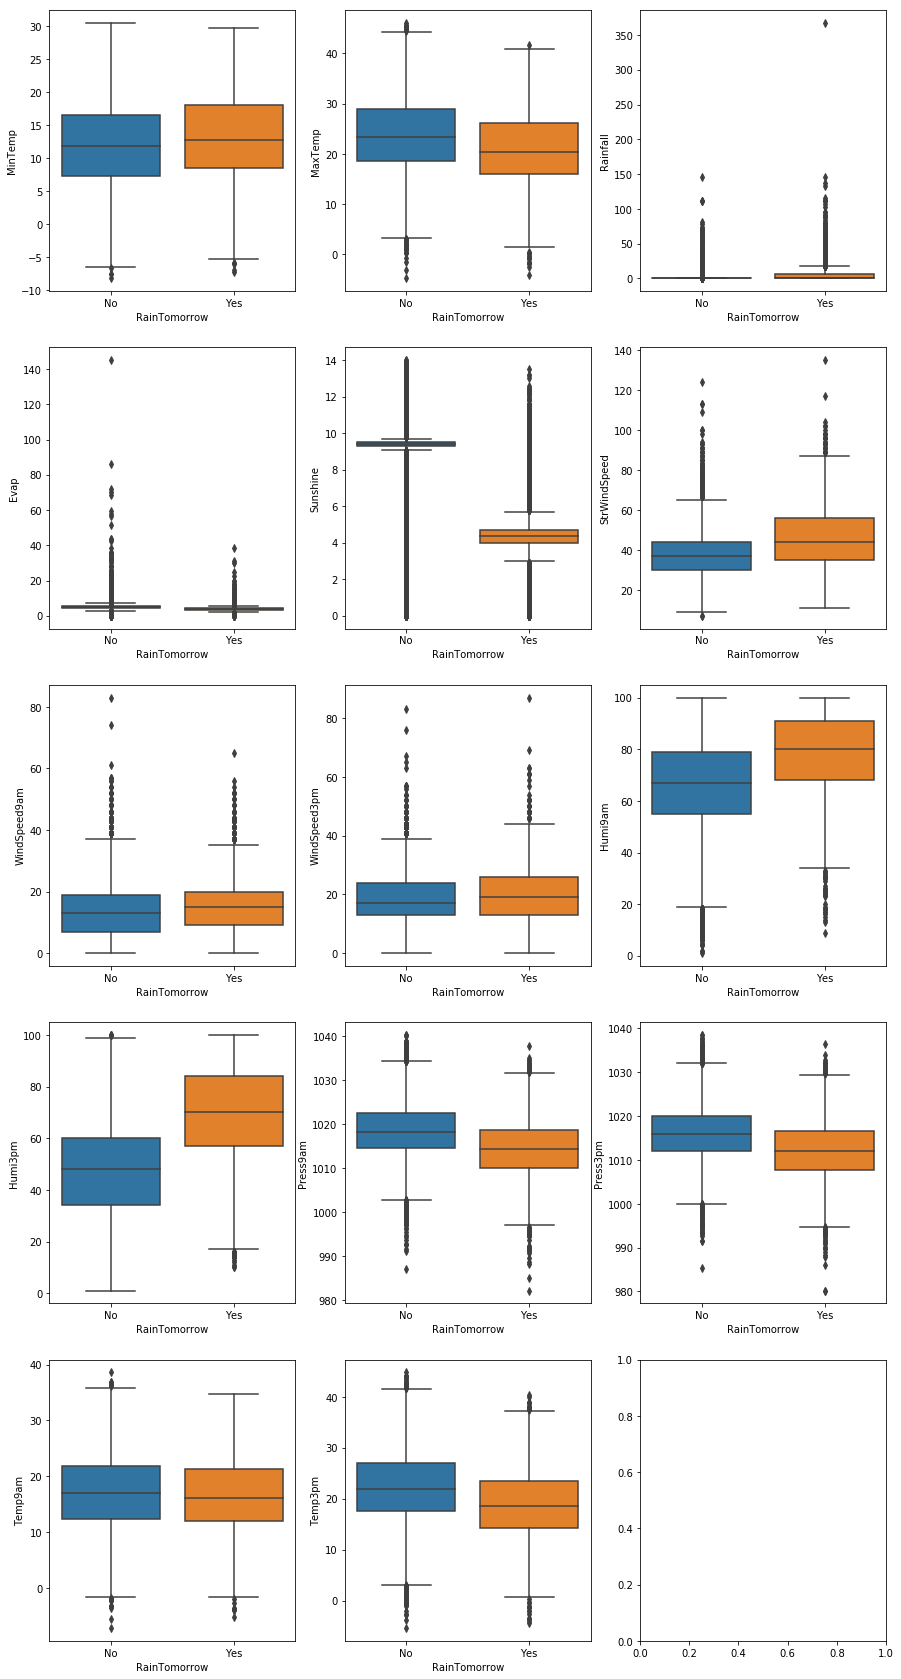

In [44]:
num_of_rows = 5
num_of_cols = 3
fig, ax = plt.subplots(num_of_rows, num_of_cols, figsize=(15,30))

i=0;j=0;k=0;
while i<num_of_rows:
    while (j<num_of_cols and k<14):
        sns.boxplot(x=total_Y.to_frame().iloc[:,0], y=total_X[col[k]], ax=ax[i, j])
        k+=1;j+=1
    j=0;i+=1
plt.show()

In [45]:

_list = ['Rainfall','Evap','StrWindSpeed','WindSpeed9am','WindSpeed3pm','Press9am','Press3pm']

def find_outliers(df,source_df, feature):
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    Lower_fence = df[feature].quantile(0.25) - (IQR * 3)
    Upper_fence = df[feature].quantile(0.75) + (IQR * 3)
    print('{feature} outliers are values < {lowerboundary} or > {upperboundary}'\
          .format(feature=feature, lowerboundary=Lower_fence, upperboundary=Upper_fence))
    out_of_middan = (source_df[feature] < Lower_fence).sum()
    out_of_top = (source_df[feature] > Upper_fence).sum()
    print(f'the number of upper outlier {out_of_top}')
    print(f'the number of lower outlier {out_of_middan}')
    
    
for feature in _list:
    find_outliers(train_df, total_X, feature)
    print()

Rainfall outliers are values < -1.7999999999999998 or > 2.4
the number of upper outlier 2639
the number of lower outlier 0

Evap outliers are values < -11.800000000000002 or > 21.800000000000004
the number of upper outlier 66
the number of lower outlier 0

StrWindSpeed outliers are values < -24.0 or > 102.0
the number of upper outlier 7
the number of lower outlier 0

WindSpeed9am outliers are values < -29.0 or > 55.0
the number of upper outlier 10
the number of lower outlier 0

WindSpeed3pm outliers are values < -20.0 or > 57.0
the number of upper outlier 13
the number of lower outlier 0

Press9am outliers are values < 985.3000000000002 or > 1050.3999999999999
the number of upper outlier 0
the number of lower outlier 2

Press3pm outliers are values < 982.1 or > 1048.6
the number of upper outlier 0
the number of lower outlier 2



In [46]:
#----------------removing the outlier and filled with the boundary value
numerical = ['Evap','StrWindSpeed','WindSpeed9am','WindSpeed3pm','Press9am','Press3pm']
lsUpper = []
lsLower = []
def removeOutliers(df,total_df,numerical):
    for i in range(len(numerical)): 
        q1 = total_df[numerical[i]].quantile(0.25)
        q3 = total_df[numerical[i]].quantile(0.75)
        IQR = q3-q1
        minimum = q1 - (IQR * 3)
        maximum = q3 + (IQR * 3)
        print(minimum)
        print(maximum)
        df.loc[(df[numerical[i]] <= minimum), numerical[i]] = minimum
        df.loc[(df[numerical[i]] >= maximum), numerical[i]] = maximum
removeOutliers(total_X,train_df,numerical)

-11.800000000000002
21.800000000000004
-24.0
102.0
-29.0
55.0
-20.0
57.0
985.3000000000002
1050.3999999999999
982.1
1048.6


In [47]:
_list = ['Evap','StrWindSpeed','WindSpeed9am','WindSpeed3pm','Press9am','Press3pm']

def find_outliers(df,source_df, feature):
    IQR = df[feature].quantile(0.75) - df[feature].quantile(0.25)
    Lower_fence = df[feature].quantile(0.25) - (IQR * 3)
    Upper_fence = df[feature].quantile(0.75) + (IQR * 3)
    print('{feature} outliers are values < {lowerboundary} or > {upperboundary}'\
          .format(feature=feature, lowerboundary=Lower_fence, upperboundary=Upper_fence))
    out_of_middan = (source_df[feature] < Lower_fence).sum()
    out_of_top = (source_df[feature] > Upper_fence).sum()
    print(f'the number of upper outlier {out_of_top}')
    print(f'the number of lower outlier {out_of_middan}')
    
    
for feature in _list:
    find_outliers(train_df, total_X, feature)
    print()

Evap outliers are values < -11.800000000000002 or > 21.800000000000004
the number of upper outlier 0
the number of lower outlier 0

StrWindSpeed outliers are values < -24.0 or > 102.0
the number of upper outlier 0
the number of lower outlier 0

WindSpeed9am outliers are values < -29.0 or > 55.0
the number of upper outlier 0
the number of lower outlier 0

WindSpeed3pm outliers are values < -20.0 or > 57.0
the number of upper outlier 0
the number of lower outlier 0

Press9am outliers are values < 985.3000000000002 or > 1050.3999999999999
the number of upper outlier 0
the number of lower outlier 0

Press3pm outliers are values < 982.1 or > 1048.6
the number of upper outlier 0
the number of lower outlier 0



In [48]:
total_X.isnull().mean()

Month           0.0
Area            0.0
MinTemp         0.0
MaxTemp         0.0
Rainfall        0.0
Evap            0.0
Sunshine        0.0
StrWindDir      0.0
StrWindSpeed    0.0
WindDir9am      0.0
WindDir3pm      0.0
WindSpeed9am    0.0
WindSpeed3pm    0.0
Humi9am         0.0
Humi3pm         0.0
Press9am        0.0
Press3pm        0.0
Cloud9am        0.0
Cloud3pm        0.0
Temp9am         0.0
Temp3pm         0.0
RainToday       0.0
dtype: float64

### Performe one-hot encoding on RainToday, StrWindDir, WindDir9am, WindDir3pm, Area

In [49]:
total_X.head()

,Month,Area,MinTemp,MaxTemp,Rainfall,Evap,Sunshine,StrWindDir,StrWindSpeed,WindDir9am,...,WindSpeed3pm,Humi9am,Humi3pm,Press9am,Press3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,12.0,2,7.4,25.1,0.0,5.0,9.4,WNW,44.0,NNW,...,22.0,44.0,25.0,1010.6,1007.8,1.0,1.0,17.2,24.3,No
1,12.0,2,17.5,32.3,1.0,5.0,9.4,W,41.0,ENE,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No
2,1.0,2,17.0,30.8,0.0,5.0,9.4,NE,37.0,NNE,...,11.0,36.0,24.0,1013.4,1008.1,1.0,1.0,20.2,29.3,No
3,1.0,2,13.9,36.6,0.0,5.0,9.4,WNW,39.0,SSE,...,15.0,39.0,10.0,1015.8,1010.6,1.0,1.0,22.0,34.4,No
4,1.0,2,18.8,35.2,6.4,5.0,9.4,WNW,52.0,S,...,28.0,43.0,28.0,1007.9,1003.9,1.0,1.0,22.8,33.0,Yes


In [50]:
total_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16937 entries, 0 to 16936
Data columns (total 22 columns):
Month           16937 non-null float64
Area            16937 non-null int64
MinTemp         16937 non-null float64
MaxTemp         16937 non-null float64
Rainfall        16937 non-null float64
Evap            16937 non-null float64
Sunshine        16937 non-null float64
StrWindDir      16937 non-null object
StrWindSpeed    16937 non-null float64
WindDir9am      16937 non-null object
WindDir3pm      16937 non-null object
WindSpeed9am    16937 non-null float64
WindSpeed3pm    16937 non-null float64
Humi9am         16937 non-null float64
Humi3pm         16937 non-null float64
Press9am        16937 non-null float64
Press3pm        16937 non-null float64
Cloud9am        16937 non-null float64
Cloud3pm        16937 non-null float64
Temp9am         16937 non-null float64
Temp3pm         16937 non-null float64
RainToday       16937 non-null object
dtypes: float64(17), int64(1), object(4

In [51]:
list_=["StrWindDir","WindDir9am","WindDir3pm",'RainToday',"Area"]
oe = OrdinalEncoder()
oe = oe.fit(total_X.loc[:,list_])
total_X_1=total_X
total_X_1.loc[:,list_]=oe.transform(total_X.loc[:,list_])

In [52]:
total_X_1.head()

,Month,Area,MinTemp,MaxTemp,Rainfall,Evap,Sunshine,StrWindDir,StrWindSpeed,WindDir9am,...,WindSpeed3pm,Humi9am,Humi3pm,Press9am,Press3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,12.0,2.0,7.4,25.1,0.0,5.0,9.4,14.0,44.0,6.0,...,22.0,44.0,25.0,1010.6,1007.8,1.0,1.0,17.2,24.3,0.0
1,12.0,2.0,17.5,32.3,1.0,5.0,9.4,13.0,41.0,1.0,...,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0
2,1.0,2.0,17.0,30.8,0.0,5.0,9.4,4.0,37.0,5.0,...,11.0,36.0,24.0,1013.4,1008.1,1.0,1.0,20.2,29.3,0.0
3,1.0,2.0,13.9,36.6,0.0,5.0,9.4,14.0,39.0,10.0,...,15.0,39.0,10.0,1015.8,1010.6,1.0,1.0,22.0,34.4,0.0
4,1.0,2.0,18.8,35.2,6.4,5.0,9.4,14.0,52.0,8.0,...,28.0,43.0,28.0,1007.9,1003.9,1.0,1.0,22.8,33.0,1.0


In [53]:
oh = OneHotEncoder()
oh = oh.fit(total_X.loc[:,list_])
total_X_2=oh.transform(total_X.loc[:,list_]).toarray()

In [54]:
total_X_2

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [55]:
total_X_2=pd.DataFrame(total_X_2)
total_X_2.head()

,0,1,2,3,4,5,6,7,8,9,...,89,90,91,92,93,94,95,96,97,98
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
total_X1=pd.merge(total_X,total_X_2, left_index=True, right_index=True, how='outer')
total_X1.shape

(16937, 121)

In [57]:
total_X1.drop(columns=["StrWindDir", "WindDir9am", "WindDir3pm", "RainToday", "Area"], axis=1, inplace=True)
total_X1.shape

(16937, 116)

In [58]:
predict_df.head()

,Month,Area,MinTemp,MaxTemp,Rainfall,Evap,Sunshine,StrWindDir,StrWindSpeed,WindDir9am,...,WindSpeed3pm,Humi9am,Humi3pm,Press9am,Press3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,1,10,21.9,38.4,0.0,11.4,12.2,WNW,31.0,WNW,...,6.0,37.0,22.0,1012.7,1009.1,1.0,5.0,29.1,35.6,No
1,2,10,27.2,43.4,0.0,14.2,12.6,NNW,37.0,N,...,7.0,33.0,14.0,1005.9,1003.3,1.0,3.0,32.6,43.0,No
2,3,10,20.9,34.3,0.0,10.2,7.9,NNW,28.0,NE,...,13.0,46.0,19.0,1014.4,1011.9,7.0,1.0,21.9,32.8,No
3,12,10,21.5,27.2,0.0,10.6,0.5,NE,46.0,ENE,...,26.0,71.0,50.0,1014.7,1012.6,7.0,7.0,23.5,26.6,No
4,5,10,6.7,20.6,0.0,2.8,5.9,NNE,33.0,ENE,...,13.0,55.0,29.0,1020.8,1016.3,1.0,4.0,13.0,19.6,No


In [59]:
# df_StrWindDir1 = pd.get_dummies(predict_df["StrWindDir"], prefix="1")
# df_WindDir9am1 = pd.get_dummies(predict_df["WindDir9am"], prefix="2")
# df_WindDir3pm1 = pd.get_dummies(predict_df["WindDir3pm"], prefix="3")
# df_RainToday1 = pd.get_dummies(predict_df["RainToday"])
# df_Area1 = pd.get_dummies(predict_df["Area"])
# predict_df1 = pd.concat([predict_df, df_StrWindDir1, df_WindDir9am1, df_WindDir3pm1, df_RainToday1, df_Area1], axis=1)
# predict_df1.drop(columns=["StrWindDir", "WindDir9am", "WindDir3pm", "RainToday", "Area"], axis=1, inplace=True)
predict_df_1=predict_df
predict_df_1.loc[:,list_]=oe.transform(predict_df_1.loc[:,list_])

In [60]:
predict_df_1=oh.transform(predict_df.loc[:,list_]).toarray()
predict_df_2=pd.DataFrame(predict_df_1)

predict_df1=pd.merge(predict_df,predict_df_2, left_index=True, right_index=True, how='outer')
predict_df1.shape

(798, 121)

In [61]:
predict_df1.drop(columns=["StrWindDir", "WindDir9am", "WindDir3pm", "RainToday", "Area"], axis=1, inplace=True)
predict_df1.shape

(798, 116)

### Take average of col and create new column 

In [62]:
total_X1["AvgTemp"] = (total_X1["MinTemp"]+total_X1["MaxTemp"])/2
total_X1["WindSpeed12pm"] = (total_X1["WindSpeed3pm"]+total_X1["WindSpeed9am"])/2
total_X1["Humidity12pm"] = (total_X1["Humi3pm"]+total_X1["Humi9am"])/2
total_X1["Pressure12pm"] = (total_X1["Press9am"]+total_X1["Press3pm"])/2
total_X1["Cloud12pm"] = (total_X1["Cloud3pm"]+total_X1["Cloud9am"])/2
total_X1["Temp12am"] = (total_X1["Temp3pm"]+total_X1["Temp9am"])/2

In [63]:
total_X1.head()

,Month,MinTemp,MaxTemp,Rainfall,Evap,Sunshine,StrWindSpeed,WindSpeed9am,WindSpeed3pm,Humi9am,...,95,96,97,98,AvgTemp,WindSpeed12pm,Humidity12pm,Pressure12pm,Cloud12pm,Temp12am
0,12.0,7.4,25.1,0.0,5.0,9.4,44.0,4.0,22.0,44.0,...,0.0,0.0,0.0,0.0,16.25,13.0,34.5,1009.20,1.0,20.75
1,12.0,17.5,32.3,1.0,5.0,9.4,41.0,7.0,20.0,82.0,...,0.0,0.0,0.0,0.0,24.90,13.5,57.5,1008.40,7.5,23.75
2,1.0,17.0,30.8,0.0,5.0,9.4,37.0,15.0,11.0,36.0,...,0.0,0.0,0.0,0.0,23.90,13.0,30.0,1010.75,1.0,24.75
3,1.0,13.9,36.6,0.0,5.0,9.4,39.0,2.0,15.0,39.0,...,0.0,0.0,0.0,0.0,25.25,8.5,24.5,1013.20,1.0,28.20
4,1.0,18.8,35.2,6.4,5.0,9.4,52.0,6.0,28.0,43.0,...,0.0,0.0,0.0,0.0,27.00,17.0,35.5,1005.90,1.0,27.90


In [64]:
predict_df1["AvgTemp"] = (predict_df1["MinTemp"]+predict_df1["MaxTemp"])/2
predict_df1["WindSpeed12pm"] = (predict_df1["WindSpeed3pm"]+predict_df1["WindSpeed9am"])/2
predict_df1["Humidity12pm"] = (predict_df1["Humi3pm"]+predict_df1["Humi9am"])/2
predict_df1["Pressure12pm"] = (predict_df1["Press9am"]+predict_df1["Press3pm"])/2
predict_df1["Cloud12pm"] = (predict_df1["Cloud3pm"]+predict_df1["Cloud9am"])/2
predict_df1["Temp12am"] = (predict_df1["Temp3pm"]+predict_df1["Temp9am"])/2

In [65]:
predict_df1.head()

,Month,MinTemp,MaxTemp,Rainfall,Evap,Sunshine,StrWindSpeed,WindSpeed9am,WindSpeed3pm,Humi9am,...,95,96,97,98,AvgTemp,WindSpeed12pm,Humidity12pm,Pressure12pm,Cloud12pm,Temp12am
0,1,21.9,38.4,0.0,11.4,12.2,31.0,6.0,6.0,37.0,...,0.0,0.0,0.0,0.0,30.15,6.0,29.5,1010.90,3.0,32.35
1,2,27.2,43.4,0.0,14.2,12.6,37.0,15.0,7.0,33.0,...,0.0,0.0,0.0,0.0,35.30,11.0,23.5,1004.60,2.0,37.80
2,3,20.9,34.3,0.0,10.2,7.9,28.0,13.0,13.0,46.0,...,0.0,0.0,0.0,0.0,27.60,13.0,32.5,1013.15,4.0,27.35
3,12,21.5,27.2,0.0,10.6,0.5,46.0,22.0,26.0,71.0,...,0.0,0.0,0.0,0.0,24.35,24.0,60.5,1013.65,7.0,25.05
4,5,6.7,20.6,0.0,2.8,5.9,33.0,17.0,13.0,55.0,...,0.0,0.0,0.0,0.0,13.65,15.0,42.0,1018.55,2.5,16.30


### Split the testing and training data 

In [66]:
total_X1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16937 entries, 0 to 16936
Columns: 122 entries, Month to Temp12am
dtypes: float64(122)
memory usage: 16.5 MB


In [67]:
pd.DataFrame(total_Y).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16937 entries, 0 to 16936
Data columns (total 1 columns):
RainTomorrow    16937 non-null object
dtypes: object(1)
memory usage: 132.4+ KB


In [68]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(total_X1, total_Y, test_size=0.2, random_state=4)

In [69]:
Xtrain.head()

,Month,MinTemp,MaxTemp,Rainfall,Evap,Sunshine,StrWindSpeed,WindSpeed9am,WindSpeed3pm,Humi9am,...,95,96,97,98,AvgTemp,WindSpeed12pm,Humidity12pm,Pressure12pm,Cloud12pm,Temp12am
503,9.0,5.6,23.1,0.0,5.0,9.4,28.0,2.0,11.0,73.0,...,0.0,0.0,0.0,0.0,14.35,6.5,53.5,1027.65,1.0,18.85
7150,9.0,6.0,13.8,6.0,5.0,9.4,44.0,28.0,26.0,91.0,...,0.0,0.0,0.0,0.0,9.90,27.0,84.5,1012.25,1.0,11.60
8623,6.0,8.3,18.8,0.0,5.0,9.4,43.0,17.0,20.0,52.0,...,0.0,0.0,0.0,0.0,13.55,18.5,44.5,1015.60,1.0,15.60
9777,2.0,12.7,37.8,0.0,9.4,12.9,33.0,15.0,24.0,17.0,...,0.0,0.0,0.0,0.0,25.25,19.5,15.0,1010.75,1.5,30.95
3648,4.0,3.6,22.1,0.0,3.0,11.2,22.0,9.0,13.0,67.0,...,0.0,0.0,0.0,0.0,12.85,11.0,49.5,1032.55,0.0,16.70


In [70]:
#standardized the index
for i in [Xtrain, Xtest, Ytrain, Ytest]:
    i.index = range(i.shape[0])

In [71]:
Xtrain.head()

,Month,MinTemp,MaxTemp,Rainfall,Evap,Sunshine,StrWindSpeed,WindSpeed9am,WindSpeed3pm,Humi9am,...,95,96,97,98,AvgTemp,WindSpeed12pm,Humidity12pm,Pressure12pm,Cloud12pm,Temp12am
0,9.0,5.6,23.1,0.0,5.0,9.4,28.0,2.0,11.0,73.0,...,0.0,0.0,0.0,0.0,14.35,6.5,53.5,1027.65,1.0,18.85
1,9.0,6.0,13.8,6.0,5.0,9.4,44.0,28.0,26.0,91.0,...,0.0,0.0,0.0,0.0,9.90,27.0,84.5,1012.25,1.0,11.60
2,6.0,8.3,18.8,0.0,5.0,9.4,43.0,17.0,20.0,52.0,...,0.0,0.0,0.0,0.0,13.55,18.5,44.5,1015.60,1.0,15.60
3,2.0,12.7,37.8,0.0,9.4,12.9,33.0,15.0,24.0,17.0,...,0.0,0.0,0.0,0.0,25.25,19.5,15.0,1010.75,1.5,30.95
4,4.0,3.6,22.1,0.0,3.0,11.2,22.0,9.0,13.0,67.0,...,0.0,0.0,0.0,0.0,12.85,11.0,49.5,1032.55,0.0,16.70


In [72]:
Xtest.head()

,Month,MinTemp,MaxTemp,Rainfall,Evap,Sunshine,StrWindSpeed,WindSpeed9am,WindSpeed3pm,Humi9am,...,95,96,97,98,AvgTemp,WindSpeed12pm,Humidity12pm,Pressure12pm,Cloud12pm,Temp12am
0,2.0,15.2,38.5,0.0,12.0,12.80,37.0,19.0,19.0,12.0,...,0.0,0.0,0.0,0.0,26.85,19.0,9.0,1011.65,0.5,32.80
1,5.0,12.8,17.6,34.4,2.2,4.35,43.0,17.0,11.0,99.0,...,0.0,0.0,0.0,0.0,15.20,14.0,95.5,1019.70,8.0,16.40
2,2.0,22.7,37.1,0.0,12.0,11.30,39.0,20.0,15.0,37.0,...,0.0,0.0,0.0,0.0,29.90,17.5,27.5,1007.20,5.5,32.20
3,10.0,16.0,34.4,0.0,12.0,11.80,50.0,19.0,22.0,24.0,...,0.0,0.0,0.0,1.0,25.20,20.5,17.0,1015.20,2.5,28.75
4,6.0,0.6,23.0,0.0,3.2,10.20,24.0,6.0,9.0,44.0,...,0.0,0.0,0.0,0.0,11.80,7.5,32.0,1021.45,0.0,16.55


In [73]:
Ytrain.head()

0    No
1    No
2    No
3    No
4    No
Name: RainTomorrow, dtype: object

In [74]:
Ytest.head()

0     No
1    Yes
2     No
3     No
4     No
Name: RainTomorrow, dtype: object

In [75]:
Xtrain.shape

(13549, 122)

In [76]:
Xtest.shape

(3388, 122)

### Label encoder of Y 

In [77]:
encoder = LabelEncoder().fit(Ytrain)
Ytrain1 = pd.DataFrame(encoder.transform(Ytrain))
Ytest1 = pd.DataFrame(encoder.transform(Ytest))
total_Y = pd.DataFrame(encoder.transform(total_Y))

In [78]:
np.unique(Ytrain1)

array([0, 1])

In [79]:
np.unique(Ytest1)

array([0, 1])

### Standization

In [80]:
ss=StandardScaler()
ss = ss.fit(Xtrain.loc[:,col])
Xtrain.loc[:,col]=ss.transform(Xtrain.loc[:,col])
Xtest.loc[:,col]=ss.transform(Xtest.loc[:,col])
total_X_1.loc[:,col]=ss.transform(total_X_1.loc[:,col])
predict_df1.loc[:,col]=ss.transform(predict_df1.loc[:,col])

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
D:\Anacond

In [81]:
Xtrain.head()

,Month,MinTemp,MaxTemp,Rainfall,Evap,Sunshine,StrWindSpeed,WindSpeed9am,WindSpeed3pm,Humi9am,...,95,96,97,98,AvgTemp,WindSpeed12pm,Humidity12pm,Pressure12pm,Cloud12pm,Temp12am
0,9.0,-1.027580,-0.041380,-0.266486,-0.061092,0.419875,-0.896980,-1.350324,-0.870633,0.238294,...,0.0,0.0,0.0,0.0,14.35,6.5,53.5,1027.65,1.0,18.85
1,9.0,-0.965272,-1.346951,0.483814,-0.061092,0.419875,0.343623,1.596383,0.857243,1.192606,...,0.0,0.0,0.0,0.0,9.90,27.0,84.5,1012.25,1.0,11.60
2,6.0,-0.607003,-0.645031,-0.266486,-0.061092,0.419875,0.266085,0.349700,0.166092,-0.875069,...,0.0,0.0,0.0,0.0,13.55,18.5,44.5,1015.60,1.0,15.60
3,2.0,0.078380,2.022266,-0.266486,1.476602,1.572290,-0.509291,0.123030,0.626859,-2.730675,...,0.0,0.0,0.0,0.0,25.25,19.5,15.0,1010.75,1.5,30.95
4,4.0,-1.339118,-0.181764,-0.266486,-0.760044,1.012545,-1.362205,-0.556980,-0.640250,-0.079810,...,0.0,0.0,0.0,0.0,12.85,11.0,49.5,1032.55,0.0,16.70


In [82]:
Xtrain.shape

(13549, 122)

In [83]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Columns: 122 entries, Month to Temp12am
dtypes: float64(122)
memory usage: 12.6 MB


### Testing PCA

In [84]:
pca = PCA(n_components=50)
pca.fit(Xtrain)
XtrainPCA = pca.transform(Xtrain)
XtestPCA = pca.transform(Xtest)
Xtrain.shape

(13549, 122)

In [85]:
pca.explained_variance_ratio_

array([6.24007763e-01, 1.53370477e-01, 1.03876267e-01, 5.05537174e-02,
       2.87461059e-02, 1.97494355e-02, 4.44953051e-03, 1.88682764e-03,
       1.72587235e-03, 1.31027124e-03, 9.64383423e-04, 8.11578653e-04,
       6.58263610e-04, 6.20380779e-04, 3.72400913e-04, 2.51948986e-04,
       2.34188426e-04, 2.11403899e-04, 1.91743922e-04, 1.85848566e-04,
       1.59448768e-04, 1.52925540e-04, 1.47661911e-04, 1.42991758e-04,
       1.39020776e-04, 1.30687331e-04, 1.29438143e-04, 1.23368642e-04,
       1.22196873e-04, 1.20076230e-04, 1.17567603e-04, 1.16074607e-04,
       1.13199783e-04, 1.11886679e-04, 1.10887908e-04, 1.07394387e-04,
       1.05800855e-04, 1.04221837e-04, 1.02674947e-04, 1.02253157e-04,
       1.00563724e-04, 1.00122531e-04, 9.82175708e-05, 9.73412145e-05,
       9.57271031e-05, 9.06091433e-05, 8.98935910e-05, 8.89167605e-05,
       8.78703181e-05, 8.41115512e-05])

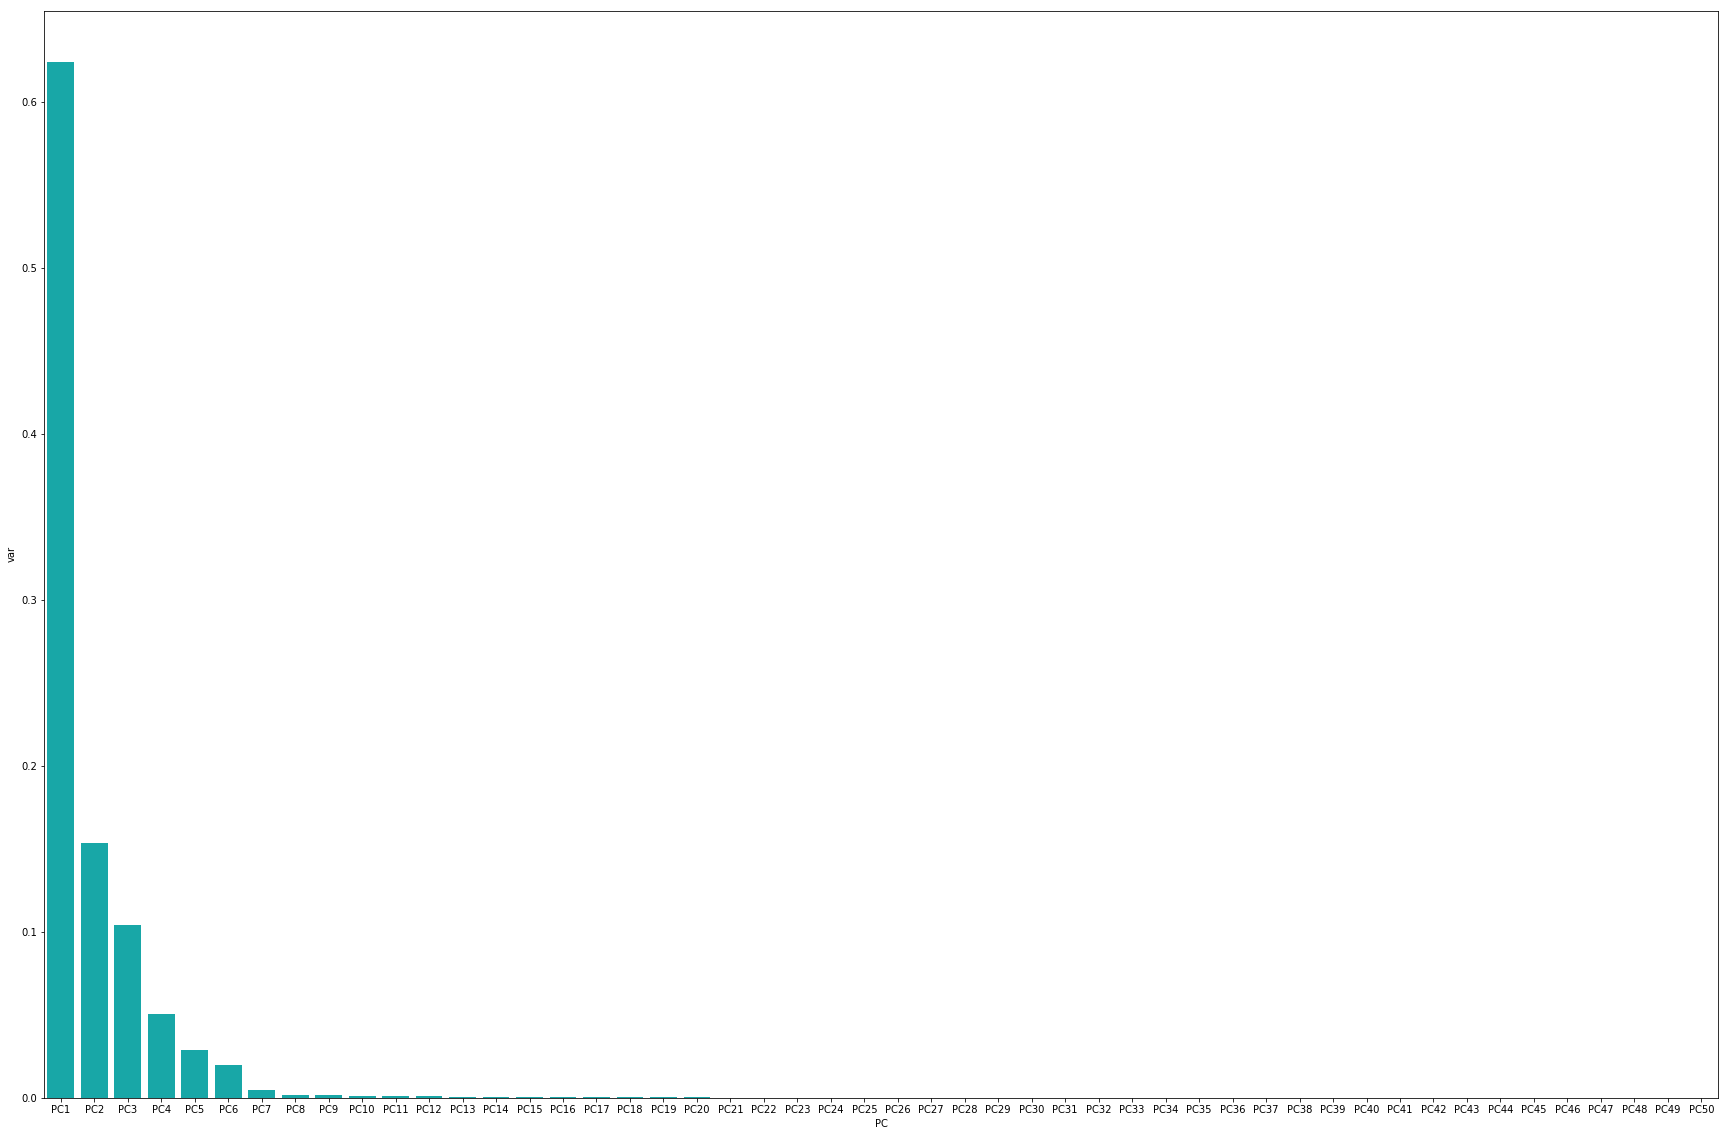

In [86]:
PC = ['PC1','PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
     'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
     'PC21','PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
     'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
     'PC41','PC42','PC43','PC44','PC45','PC46','PC47','PC48','PC49','PC50']
pca_df = pd.DataFrame({'var':pca.explained_variance_ratio_, 'PC':PC})
plt.figure(figsize=(30,20))
sns.barplot(x='PC',y="var", data=pca_df, color="c");

### Ravel

In [87]:
Ytrain1 = Ytrain1.iloc[:,0].ravel()
Ytest1 = Ytest1.iloc[:,0].ravel()

## Modeling

### RandomForest 

In [72]:
rf = RandomForestClassifier(random_state=0)
parameters = {'bootstrap': [True, False],
              'min_samples_split':np.arange(2,10,2),
              'criterion':['entropy', 'gini'],
              'n_estimators':np.arange(100,200,10),
              'max_depth':np.arange(10,100,20)
             }
grid_search1 = GridSearchCV(estimator=rf, param_grid=parameters, refit='roc_auc', scoring=['accuracy', 'roc_auc'], cv=3, n_jobs=-1)
grid_search1 = grid_search1.fit(Xtrain, Ytrain1)

In [73]:
print("Best Parameters : ",grid_search1.best_params_)
print("Best AUC-ROC : ", grid_search1.best_score_)

Best Parameters :  {'bootstrap': False, 'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 4, 'n_estimators': 190}
Best AUC-ROC :  0.870527503405402


In [88]:
rf = RandomForestClassifier(random_state=0)
parameters = {'bootstrap': [False],
              'min_samples_split':[3,4,5],
              'criterion':['entropy'],
              'n_estimators':np.arange(185,200,5),
              'max_depth':np.arange(25,35,5)
             }
grid_search1 = GridSearchCV(estimator=rf, param_grid=parameters, refit='roc_auc', scoring=['accuracy', 'roc_auc'], cv=3, n_jobs=-1)
grid_search1 = grid_search1.fit(Xtrain, Ytrain1)

KeyboardInterrupt: 

In [ ]:
print("Best Parameters : ",grid_search1.best_params_)
print("Best AUC-ROC : ", grid_search1.best_score_)

In [ ]:
rf = RandomForestClassifier(random_state=0)
parameters = {'bootstrap': [False],
              'min_samples_split':[3,4,5],
              'criterion':['entropy'],
              'n_estimators':[197],
              'max_depth':[34],
             }
grid_search1 = GridSearchCV(estimator=rf, param_grid=parameters, refit='roc_auc', scoring=['accuracy', 'roc_auc'], cv=3, n_jobs=-1)
grid_search1 = grid_search1.fit(Xtrain, Ytrain)

In [ ]:
print("Best Parameters : ",grid_search1.best_params_)
print("Best AUC-ROC : ", grid_search1.best_score_)

In [ ]:
rf = RandomForestClassifier(random_state=0)
parameters = {'bootstrap': [False],
              'min_samples_split':[3,4,5],
              'criterion':['entropy'],
              'n_estimators':[197],
              'max_depth':[34],
              'min_samples_leaf':np.arange(1,10,1)
             }
grid_search1 = GridSearchCV(estimator=rf, param_grid=parameters, refit='roc_auc', scoring=['accuracy', 'roc_auc'], cv=3, n_jobs=-1)
grid_search1 = grid_search1.fit(Xtrain, Ytrain)

In [ ]:
print("Best Parameters : ",grid_search1.best_params_)
print("Best AUC-ROC : ", grid_search1.best_score_)

In [ ]:

rf = RandomForestClassifier(random_state=0)
parameters = {'bootstrap': [False],
              'min_samples_split':[3,4,5],
              'criterion':['entropy'],
              'n_estimators':[197],
              'max_depth':[34],
              'class_weight':['balanced','None']
             }
grid_search1 = GridSearchCV(estimator=rf, param_grid=parameters, refit='roc_auc', scoring=['accuracy', 'roc_auc'], cv=3, n_jobs=-1)
grid_search1 = grid_search1.fit(Xtrain, Ytrain1)
print("Best Parameters : ",grid_search1.best_params_)
print("Best AUC-ROC : ", grid_search1.best_score_)

In [96]:
rf = RandomForestClassifier(bootstrap= False, criterion= 'entropy', min_samples_split=0.01, n_estimators= 197,
                            random_state=0,max_depth=34,class_weight="balanced")
rf.fit(Xtrain, Ytrain1)
ypred = rf.predict(Xtest)
print("\tAccuracy:{}".format(rf.score(Xtest, Ytest1)))
print("\tRecall:{}".format(recall(Ytest1, ypred)))
print("\tAUC:{}".format(auc(Ytest1, rf.predict_proba(Xtest)[:, 1])))

	Accuracy:0.9090909090909091
	Recall:0.8717156105100463
	AUC:0.9621625248741562


In [97]:
final_RF = rf.predict(predict_df1)
pd.DataFrame(final_RF, columns=['ans']).to_csv('./result2_RF.csv',index = False)
rs = pd.read_csv('./result2_RF.csv')

col_name=rs.columns.tolist()
col_name.insert(0,'id')                      
rs=rs.reindex(columns=col_name)

j = rs.shape[0]
for i in range(j):
    rs.iloc[i,0]=i
rs.to_csv('./final_RFb.csv',index=False)

### SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_auc_score,recall_score

In [106]:
print("starting")
for kernel in['linear']:
    clf = SVC(kernel =kernel,
             gamma='auto',
             degree = 1,
             class_weight='balanced').fit(Xtrain,Ytrain1)
    result = clf.predict(Xtest)
    score = clf.score(Xtest,Ytest1)
    recall = recall(Ytest1,result)
    auc = auc(Ytest1,clf.decision_function(Xtest))
    print("%s 'testing accuracy %f,recall: %f', auc: %f"%(kernel,score,recall,auc))
    #print(datetime.datetime.fromtimestamp(time()-times).strftime('%M:%s:%f'))

starting
linear 'testing accuracy 0.876033,recall: 0.879444', auc: 0.945009


ValueError: X.shape[1] = 22 should be equal to 122, the number of features at training time

In [107]:
final_svm_b = clf.predict(predict_df1)
pd.DataFrame(final_svm_b, columns=['ans']).to_csv('./result2_bb.csv',index = False)
rs = pd.read_csv('./result2_bb.csv')

col_name=rs.columns.tolist()
col_name.insert(0,'id')                      
rs=rs.reindex(columns=col_name)

j = rs.shape[0]
for i in range(j):
    rs.iloc[i,0]=i
rs.to_csv('./final_svm_bb.csv',index=False)

### XGBoost

In [101]:
print('starting...')
params = {"n_estimators": np.arange(
    100, 200, 10), "learning_rate": np.arange(0.05, 0.3, 0.05), "scale_pos_weight":np.linspace(3,6,5)}
clf = XGBClassifier()
gscv = GridSearchCV(clf, param_grid=params, refit='roc_auc', scoring=["accuracy","roc_auc"], cv=3)
gscv.fit(Xtrain, Ytrain1)
print('finished!')

starting...
finished!


In [103]:
print("Best Parameters : ",gscv.best_params_)
print("Best AUC-ROC : ", gscv.best_score_)

Best Parameters :  {'learning_rate': 0.15000000000000002, 'n_estimators': 150, 'scale_pos_weight': 5.25}
Best AUC-ROC :  0.974137137972059


In [103]:
print('starting...')
clf = XGBClassifier(n_estimators=150,learning_rate=0.15,scale_pos_weight=12,
                    random_state=100,gamma=2,max_depth=2,min_child_weight=4).fit(Xtrain, Ytrain1)
ypred = clf.predict(Xtest)
# ,max_depth=2,min_child_weight=4
clf.score(Xtest, Ytest1)
print("\tAccuracy:{}".format(clf.score(Xtest, Ytest1)))
print("\tRecall:{}".format(recall(Ytest1, ypred)))
print("\tAUC:{}".format(auc(Ytest1, clf.predict_proba(Xtest)[:, 1])))
print('finished!')

starting...
	Accuracy:0.8636363636363636
	Recall:0.9381761978361669
	AUC:0.9720439578285432
finished!


In [104]:
preds= clf.predict(predict_df1)
pd.DataFrame(preds, columns=['ans']).to_csv('result_XGB2.csv',index = False)
rs = pd.read_csv('./result_XGB2.csv')
col_name=rs.columns.tolist()
col_name.insert(0,'id')                      
rs=rs.reindex(columns=col_name)

j = rs.shape[0]
for i in range(j):
    rs.iloc[i,0]=i
# rs.to_csv('./XGB_l_ori.csv',index=False)
rs.to_csv('./XGB_l_b2_one.csv',index=False)

In [102]:
print('starting...')
params = {"n_estimators": np.arange(110, 130, 3), "learning_rate": np.linspace(0.2, 0.3, 3), 
          "scale_pos_weight":np.linspace(4,6,3),'max_depth':[2,3,4],'min_child_weight':[2,3,4]}
clf = XGBClassifier()
gscv = GridSearchCV(clf, param_grid=params, refit='roc_auc', scoring=["accuracy","roc_auc"], cv=3)
gscv.fit(Xtrain, Ytrain1)
print('finished!')

starting...
finished!


In [104]:
print("Best Parameters : ",gscv.best_params_)
print("Best AUC-ROC : ", gscv.best_score_)

Best Parameters :  {'learning_rate': 0.2, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 125, 'scale_pos_weight': 4.0}
Best AUC-ROC :  0.8744530382225161


In [109]:
print('starting...')
clf = XGBClassifier(n_estimators=125, max_depth=3, learning_rate=0.2,min_child_weight=3,
                    scale_pos_weight=4.7,random_state=100).fit(Xtrain, Ytrain1)
ypred = clf.predict(Xtest)
clf.score(Xtest, Ytest1)
print("\tAccuracy:{}".format(clf.score(Xtest, Ytest1)))
print("\tRecall:{}".format(recall(Ytest1, ypred)))
print("\tAUC:{}".format(auc(Ytest1, clf.predict_proba(Xtest)[:, 1])))
print('finished!')

starting...
	Accuracy:0.8008189529102077
	Recall:0.7520391517128875
	AUC:0.8683271921389611
finished!


In [110]:
preds= clf.predict(predict_df1)
pd.DataFrame(preds, columns=['ans']).to_csv('result_XGB2.csv',index = False)
rs = pd.read_csv('./result_XGB2.csv')
col_name=rs.columns.tolist()
col_name.insert(0,'id')                      
rs=rs.reindex(columns=col_name)

j = rs.shape[0]
for i in range(j):
    rs.iloc[i,0]=i
# rs.to_csv('./XGB_l_ori.csv',index=False)
rs.to_csv('./XGB_l_b2_one.csv',index=False)

### LightGBM

In [89]:
import warnings
warnings.filterwarnings('ignore')

print('start...')
parameters = {
    'max_depth': np.arange(1,8,2),
    'num_leaves': np.arange(10,100,20),
    'learning_rate':np.linspace(0.1,0.7,4),
    'num_iterations' :np.arange(100,200,20)
}

gbm = lgb.LGBMClassifier()
# scale_pos_weight=5.3333,
gsearch = GridSearchCV(gbm, param_grid=parameters, refit='roc_auc', scoring=["accuracy","roc_auc"], cv=3)
gsearch.fit(Xtrain, Ytrain1)
print('best parameters:{0}'.format(gsearch.best_params_))
print('best auc:{0}'.format(gsearch.best_score_))
print(gsearch.cv_results_['mean_test_score'])
print(gsearch.cv_results_['params'])

start...


KeyboardInterrupt: 

In [1]:
print("Best Parameters : ",gsearch.best_params_)
print("Best AUC-ROC : ", gsearch.best_score_)

NameError: name 'gsearch' is not defined

In [90]:
print('starting...')
lgbm = lgb.LGBMClassifier(num_iterations=200, max_depth=6, learning_rate=0.1,num_leaves=10,
                    scale_pos_weight = 5.3331,random_state=100).fit(Xtrain, Ytrain1)
ypred = lgbm.predict(Xtest)
lgbm.score(Xtest, Ytest1)
print("\tAccuracy:{}".format(lgbm.score(Xtest, Ytest1)))
print("\tRecall:{}".format(recall(Ytest1, ypred)))
print("\tAUC:{}".format(auc(Ytest1, lgbm.predict_proba(Xtest)[:, 1])))
print('finished!')

starting...


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


	Accuracy:0.9203069657615112
	Recall:0.884080370942813
	AUC:0.973485798964378
finished!


In [91]:
preds= lgbm.predict(predict_df1)
pd.DataFrame(preds, columns=['ans']).to_csv('result_LGBM.csv',index = False)
rs = pd.read_csv('./result_LGBM.csv')
col_name=rs.columns.tolist()
col_name.insert(0,'id')                      
rs=rs.reindex(columns=col_name)

j = rs.shape[0]
for i in range(j):
    rs.iloc[i,0]=i
    
rs.to_csv('./LGBM_one.csv',index=False)

In [149]:
#-------------adjust2

parameters = {
    'min_child_samples': np.arange(10,20,2),
    'min_child_weight': np.linspace(0.001,0.003,4)
}
gbm = lgb.LGBMClassifier(objective = 'binary',
                         is_unbalance = True,
                         metric = 'binary_logloss,auc',
                         max_depth = 6,
                         num_leaves = 10,
                         learning_rate = 0.1,
                         feature_fraction = 0.7,
                         min_child_samples=21,
                         min_child_weight=0.001,
                         bagging_fraction = 1,
                         bagging_freq = 2,
                         reg_alpha = 0.001,
                         reg_lambda = 8,
                         cat_smooth = 0,
                         num_iterations = 200,   
                        )
gsearch = GridSearchCV(gbm, param_grid=parameters, refit='roc_auc', scoring=["accuracy","roc_auc"], cv=3)
gsearch.fit(Xtrain, Ytrain1)

D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


[LightGBM] [Warning] feature_fraction is set=0.7, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.7
[LightGBM] [Warning] bagging_fraction is set=1, subsample=1.0 will be ignored. Current value: bagging_fraction=1
[LightGBM] [Warning] bagging_freq is set=2, subsample_freq=0 will be ignored. Current value: bagging_freq=2
Best Parameters :  {'min_child_samples': 18, 'min_child_weight': 0.001}
Best AUC-ROC :  0.8754565730053091


In [150]:
print("Best Parameters : ",gsearch.best_params_)
print("Best AUC-ROC : ", gsearch.best_score_)

Best Parameters :  {'min_child_samples': 18, 'min_child_weight': 0.001}
Best AUC-ROC :  0.8754565730053091


In [177]:
def Lgbm(x):
    lgbm = lgb.LGBMClassifier(num_iterations=200, max_depth=9, learning_rate=0.1,num_leaves=10,min_child_samples=16,
                        scale_pos_weight = x,random_state=100).fit(Xtrain, Ytrain1)
    ypred = clf.predict(Xtest)
    lgbm.score(Xtest, Ytest1)
    print("\tAccuracy:{}".format(lgbm.score(Xtest, Ytest1)))
    print("\tRecall:{}".format(recall(Ytest1, ypred)))
    print("\tAUC:{}".format(auc(Ytest1, lgbm.predict_proba(Xtest)[:, 1])))

In [178]:
print('starting')
x_range = np.arange(2,7,0.5)
for i in x_range:
    print(i)
    Lgbm(i)
print('finish!')

starting
2.0


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


	Accuracy:0.8508335770693185
	Recall:0.7520391517128875
	AUC:0.8729612843138508
2.5


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


	Accuracy:0.8388417665984206
	Recall:0.7520391517128875
	AUC:0.8708968430501408
3.0


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


	Accuracy:0.8382568002339865
	Recall:0.7520391517128875
	AUC:0.8709293997132688
3.5


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


	Accuracy:0.8277274056741737
	Recall:0.7520391517128875
	AUC:0.8704369801834567
4.0


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


	Accuracy:0.8236326411231354
	Recall:0.7520391517128875
	AUC:0.8707683605045817
4.5


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


	Accuracy:0.8136882129277566
	Recall:0.7520391517128875
	AUC:0.8702300128249998
5.0


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


	Accuracy:0.7999415033635566
	Recall:0.7520391517128875
	AUC:0.8691236676476299
5.5


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


	Accuracy:0.7917519742614799
	Recall:0.7520391517128875
	AUC:0.8705698229963991
6.0


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


	Accuracy:0.7859023106171396
	Recall:0.7520391517128875
	AUC:0.8714340279917538
6.5


D:\Anaconda3\lib\site-packages\lightgbm\engine.py:151: UserWarning: Found `num_iterations` in params. Will use it instead of argument
  warnings.warn("Found `{}` in params. Will use it instead of argument".format(alias))


	Accuracy:0.7782977478794969
	Recall:0.7520391517128875
	AUC:0.8709253301303778
finish!


In [ ]:
preds= clf.predict(predict_df1)
pd.DataFrame(preds, columns=['ans']).to_csv('result_LGBM.csv',index = False)
rs = pd.read_csv('./result_LGBM.csv')
col_name=rs.columns.tolist()
col_name.insert(0,'id')                      
rs=rs.reindex(columns=col_name)

j = rs.shape[0]
for i in range(j):
    rs.iloc[i,0]=i
    
rs.to_csv('./LGBM_one.csv',index=False)

### Logistic Regression

In [ ]:
params = {'C':np.linspace(0.001,100,50),
          'max_iter':[1, 10, 100, 500],
          'class_weight':['balanced', None],
          'solver':['liblinear']
         }
lr = LogisticRegression()
grid_search1 = GridSearchCV(estimator=lr, param_grid=parameters, refit='roc_auc', scoring=['accuracy', 'roc_auc'], cv=3, n_jobs=-1)
grid_search1 = grid_search1.fit(Xtrain, Ytrain1)
print('finish!')

In [ ]:
from sklearn.metrics import confusion_matrix as cm, recall_score as recall, roc_auc_score as auc
logclf=LR(solver='liblinear',C=0.7777777777777777,class_weight='balanced').fit(Xtrain,Ytrain1)
ypred = logclf.predict(Xtest)
print("\tAccuracy:{}".format(logclf.score(Xtest, Ytest1)))
print("\tRecall:{}".format(recall(Ytest1, ypred)))
print("\tAUC:{}".format(auc(Ytest1, logclf.predict_proba(Xtest)[:, 1])))

In [ ]:
final_LR = logclf.predict(predict_df)
pd.DataFrame(final_LR, columns=['ans']).to_csv('./result2_LR.csv',index = False)

rs = pd.read_csv('./result2_LR.csv')

col_name=rs.columns.tolist()
col_name.insert(0,'id')                      
rs=rs.reindex(columns=col_name)

j = rs.shape[0]
for i in range(j):
    rs.iloc[i,0]=i
rs.to_csv('./final2_LR.csv',index=False)